# IBM Developer Skills Network

# Classification model with Keras

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Keras data set can be found in 'https://keras.io/api/datasets/'

In [4]:
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [9]:
X_train.shape # 60000 image for train

(60000, 28, 28)

In [13]:
print(X_train[1]) # color data from 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [6]:
X_test.shape # 10000 image for test

(10000, 28, 28)

## Let's visualize the 1st image

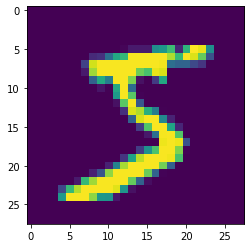

In [7]:
plt.imshow(X_train[0])

## Flatten the image to one-dimensional vectors, each of size 1x(28x28) = 1x784

In [14]:
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [15]:
X_train.shape

(60000, 784)

## Normalize the vectors to 0-1 from 0-255

In [16]:
X_train = X_train / 255
X_test = X_test / 255

## Divide target variable into categories

In [17]:
# one hot encoder
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [18]:
y_test.shape

(10000, 10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build a Neural Network

In [20]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu',input_shape=(num_pixels,))) # input layer
    model.add(Dense(100, activation='relu'))  # use ReLu activation function - hidden layer
    model.add(Dense(num_classes, activation='softmax'))  # use softmax activation function - output layer

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network

In [21]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 10s - loss: 0.1862 - accuracy: 0.9431 - val_loss: 0.0955 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 - 10s - loss: 0.0779 - accuracy: 0.9759 - val_loss: 0.0823 - val_accuracy: 0.9747
Epoch 3/10
1875/1875 - 9s - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 - 8s - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9796
Epoch 5/10
1875/1875 - 9s - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0683 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 - 9s - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0797 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 - 9s - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.1139 - val_accuracy: 0.9747
Epoch 8/10
1875/1875 - 8s - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0798 - val_accuracy: 0.9801
Epoch 9/10
1875/1875 - 9s - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0919 - val_accuracy: 0.9814
Epoch 10/10
1875/1875 - 9s - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0866 

In [22]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.982200026512146% 
 Error: 0.017799973487854004


## Save the model after training

In [23]:
model.save('classification_model.h5')

## Reload the model

In [24]:
from keras.models import load_model
pretrained_model = load_model('classification_model.h5')